In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [25]:
# Carregando a imagem:
imagem = cv2.imread('C:/Users/ramon/OneDrive/Documentos/GitHub/visao-computacional/images/veropeso.jpg')

In [26]:
imagem.shape

(1152, 1920, 3)

In [27]:
# Mostrando algumas informações básicas 
print(f"Altura: {imagem.shape[0]} pixels")
print(f"Largura: {imagem.shape[1]} pixels")
print(f"Canais de cores: {imagem.shape[2]}")

Altura: 1152 pixels
Largura: 1920 pixels
Canais de cores: 3


In [28]:
# Mostramdo a imagem 
cv2.imshow('Figura', imagem)
cv2.waitKey(0) # Aguarda uma tecla ser presionada para fechar a imagem aberta
cv2.destroyAllWindows() # Fecha a janela aberta

In [29]:
# Salvando uma cópia da imagem
cv2.imwrite('C:/Users/ramon/OneDrive/Documentos/GitHub/visao-computacional/images/copia/veropeso-cv.jpg', imagem)

True

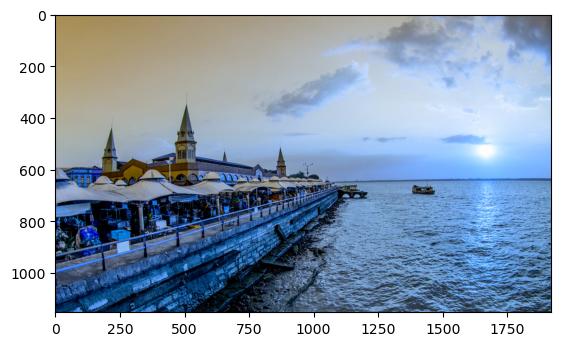

In [30]:
# Mostrando a imagem dentro do Jupyter Notebook 
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # O OpenCV armazena a imagem no formato BGR em vez de RGB
plt.imshow(imagem)
plt.show()

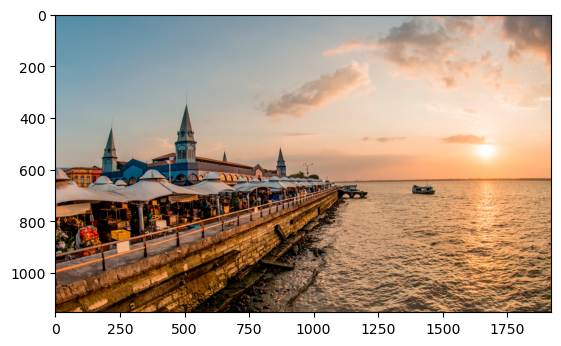

In [31]:
# Mostrando a imagem RGB 
plt.imshow(imagem_rgb)
plt.show()

In [32]:
# Splitting & Merging 

# Carregando a imagem e obtendo cada canal BGR separadamente 
(b, g, r) = cv2.split(imagem)

# Agora vamos visualizar cada canal em cores separadamente (zerando os canais de outras cores em cada cenário)
import numpy as np
zeros = np.zeros(imagem.shape[:2], dtype = 'uint8') # Cria matriz de duas dimensões (altura, largura) preenchida de zeros
cv2.imshow('Vermelho', cv2.merge([zeros, zeros, r]))
cv2.imshow('Verde', cv2.merge([zeros, g, zeros]))
cv2.imshow('Azul', cv2.merge([b, zeros, zeros]))

# Juntando novamente a imagem 
merged = cv2.merge([b, g, r])
cv2.imshow('Merged', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
# Convertando para a escala cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) 
cv2.imshow('Merged', imagem_cinza)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
imagem_cinza.shape

(1152, 1920)

In [35]:
# Coletando as informações de um pixel localizado em determinada posição da imagem 
(b, g, r) = imagem[240, 125]
print(f"O pixwl localizado na posição [240, 125] possui as cores RGB: {r}, {g}, {b} ")

O pixwl localizado na posição [240, 125] possui as cores RGB: 127, 160, 177 


In [36]:
# Mudando o valor de um pixel
imagem[240, 125] = (50, 230, 14)

(b, g, r) = imagem[240, 125]
print(f"O pixwl localizado na posição [240, 125] possui as cores RGB: {r}, {g}, {b} ")

O pixwl localizado na posição [240, 125] possui as cores RGB: 14, 230, 50 


In [37]:
# Manipulando vários pixels de uma vez
imagem_pintada = imagem.copy()
imagem_pintada[80:150, 600:700] = (50, 230, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

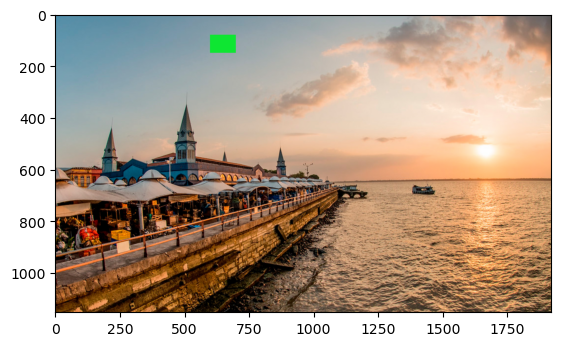

In [38]:
imagem_rgb = cv2.cvtColor(imagem_pintada, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show

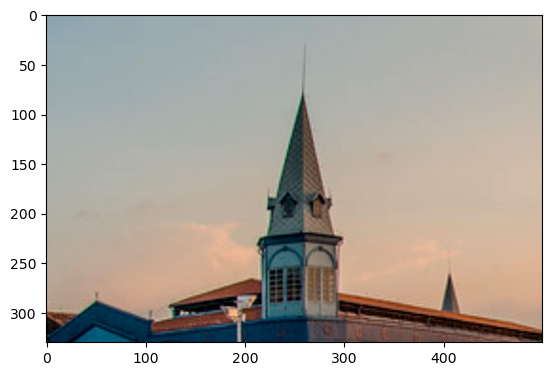

In [39]:
retangulo = imagem[270:600, 250:750]
imagem_rgb = cv2.cvtColor(retangulo, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show()

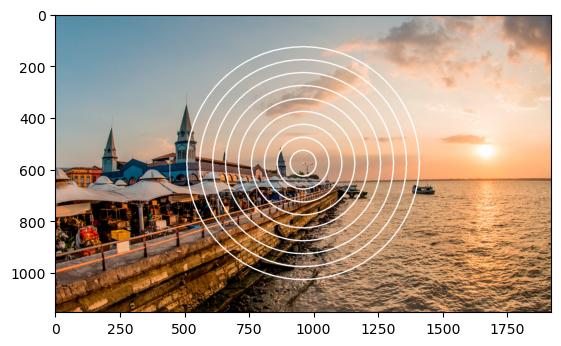

In [40]:
# Desenhando em cima de uma imagem
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
(centro_x, centro_y) = (imagem.shape[1] // 2, imagem.shape[0] // 2)
branco = (255, 255, 255)

for raio in range(0, 500, 50):
    cv2.circle(imagem_rgb, (centro_x, centro_y), raio, branco, 3) # Desenha um círculo branco na imagem


plt.imshow(imagem_rgb)
plt.show()

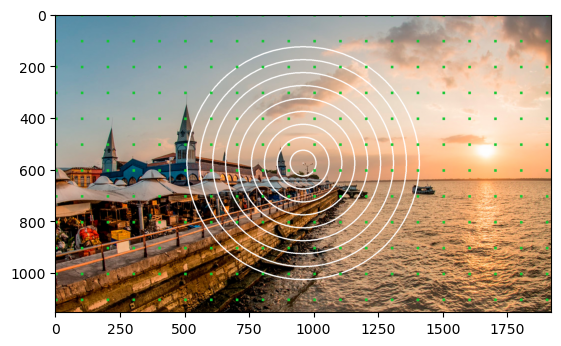

In [42]:
# Outro exemplo de desenho em imagem
for y in range(0, imagem_rgb.shape[0], 100):
    for x in range(0, imagem_rgb.shape[1], 100):
        imagem_rgb[y:y+10, x:x+10] = (20, 200, 50) 
plt.imshow(imagem_rgb)
plt.show()

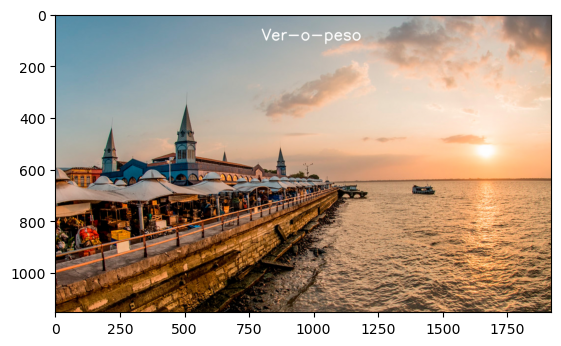

In [50]:
# Escrevendo textos em imagens
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
fonte = cv2.FONT_HERSHEY_SIMPLEX
linha = cv2.LINE_AA
cv2.putText(imagem_rgb, 'Ver-o-peso', (800, 100), fonte, 2, (255, 255, 255), 3, linha) 
# (imagem, texto, posição, fonte, tamanho da fonte, cor, espessura, linha)

plt.imshow(imagem_rgb)
plt.show()


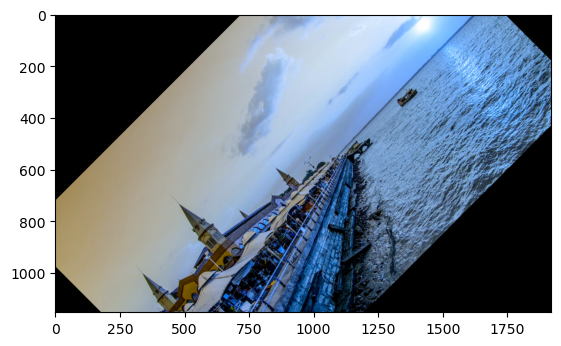

In [51]:
# Rotacionadno a imagem

# Obtendo as dimensões da imagem
(altura, largura) = imagem.shape[:2]
centro = (largura // 2, altura // 2) 

# Rotacionando a imagem em 45 graus
parametros_rot = cv2.getRotationMatrix2D(centro, 45, 1.0) # (centro, ângulo, escala) - escala é o zoom
rotacionando = cv2.warpAffine(imagem, parametros_rot, (largura, altura)) # (imagem, parâmetros de rotação, tamanho da imagem)
plt.imshow(rotacionando)
plt.show()

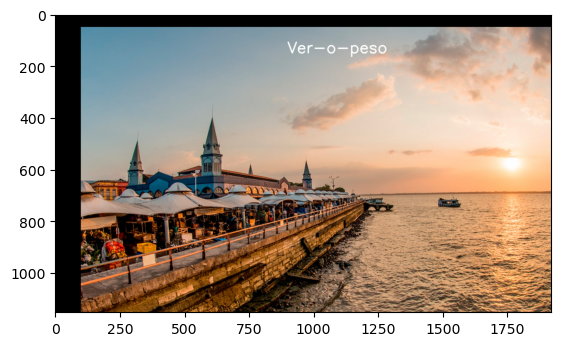

In [53]:
# Deslocando a imagem

# Preciso especificar quantos pixels quero moevr nas direções x e y, dessa forma: [[1, 0, deslocamento_x], [0, 1, deslocamento_y]]
parametros_shift = np.float32([[1, 0, 100], [0, 1, 50]]) # Movendo 100 pixels para a direita e 50 pixels para baixo
deslocando = cv2.warpAffine(imagem_rgb, parametros_shift, (largura, altura))
plt.imshow(deslocando)
plt.show()

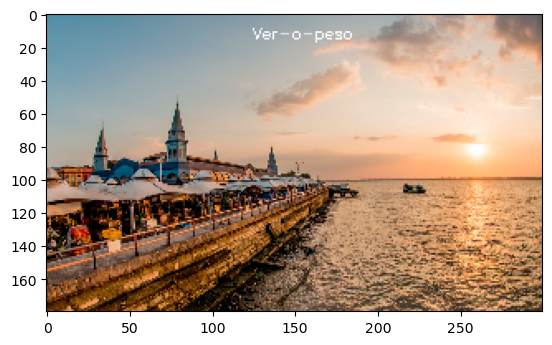

In [58]:
# Redimensionando a imagem

# Salvando as dimensões da imagem original
(altura, largura) = imagem_rgb.shape[:2]
nova_larg = 300

# Definindo a nova altura proporcionalmente
nova_alt = int(nova_larg*(altura/largura)) # Mantendo a proporção

# Executando o redimensionamento
imagem_redimensionada = cv2.resize(imagem_rgb, (nova_larg, nova_alt), interpolation = cv2.INTER_CUBIC) # (imagem, (largura, altura), interpolação)
plt.imshow(imagem_redimensionada)
plt.show()

# Exitem 4 tipos de interpolação: INTER_NEAREST, INTER_LINEAR, INTER_CUBIC e INTER_LANCZOS4
# INTER_NEAREST: A interpolação mais rápida, mas com qualidade inferior
# INTER_LINEAR: A interpolação padrão, mais lenta que a INTER_NEAREST, mas com qualidade melhor
# INTER_CUBIC: A interpolação mais lenta, mas com qualidade superior
# INTER_LANCZOS4: A interpolação mais lenta, mas com qualidade superior

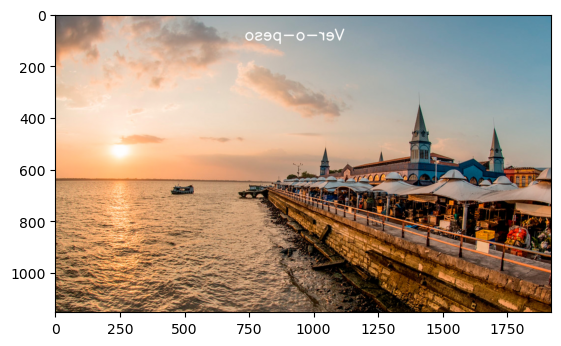

In [ ]:
# Flipping 

# Flipando a imagem na horizontal
imagem_flip_horizontal = cv2.flip(imagem_rgb, 1) # 1 = horizontal, 0 = vertical, -1 = ambos
plt.imshow(imagem_flip_horizontal)
plt.show()